# Chinese Chess Characters Recognition 

In [21]:
%reset
%matplotlib inline
import os
import cv2 
import common 
import numpy as np
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from skimage import img_as_float
from pathlib import Path
import random

def imshow_all(*images, titles=None, axis=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    if len(images)>1:
        for ax, img, label in zip(axes.ravel(), images, titles):
            ax.imshow(img, vmin=vmin, vmax=vmax)
            if axis is not None:
                ax.axis('off')
            ax.set_title(label)
    else:
        plt.imshow(images[0])
def cb(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def cg(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
def cbg(*images, cvtColor=None):
    for img in images:
        return cb(cg(cb(img)))
def plot1(image, title='', axis=None):
    plt.imshow(image)
    plt.title(title)
    if axis is not None:
        plt.axis('off')

In [22]:
#pip install -r requisites.txt

In [23]:
directory = 'imgs_p/p/input2'
fls = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        fls.append(f)

input_img_path = random.choice(fls)
#input_img = fls[0]

input_img = cv2.imread(input_img_path)
#input_img = cv2.resize(input_img, (600,600), interpolation= cv2.INTER_AREA) #we 

img7_0 = cb(input_img)
img7 = cbg(input_img)
img7g = cg(input_img)

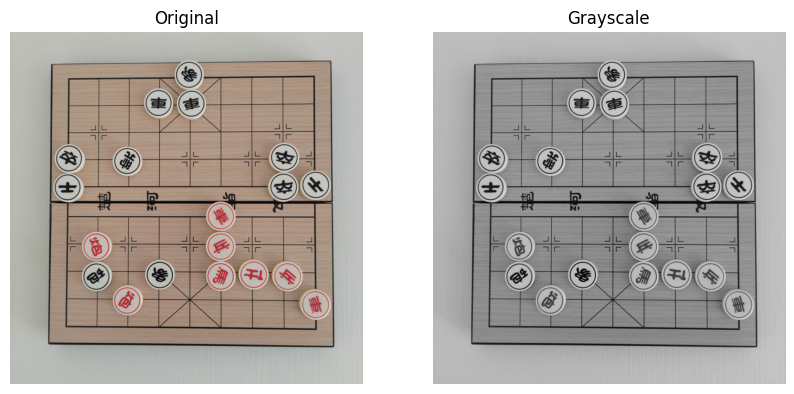

In [24]:
imshow_all(img7_0,img7,titles = ['Original','Grayscale'],axis = 'off')

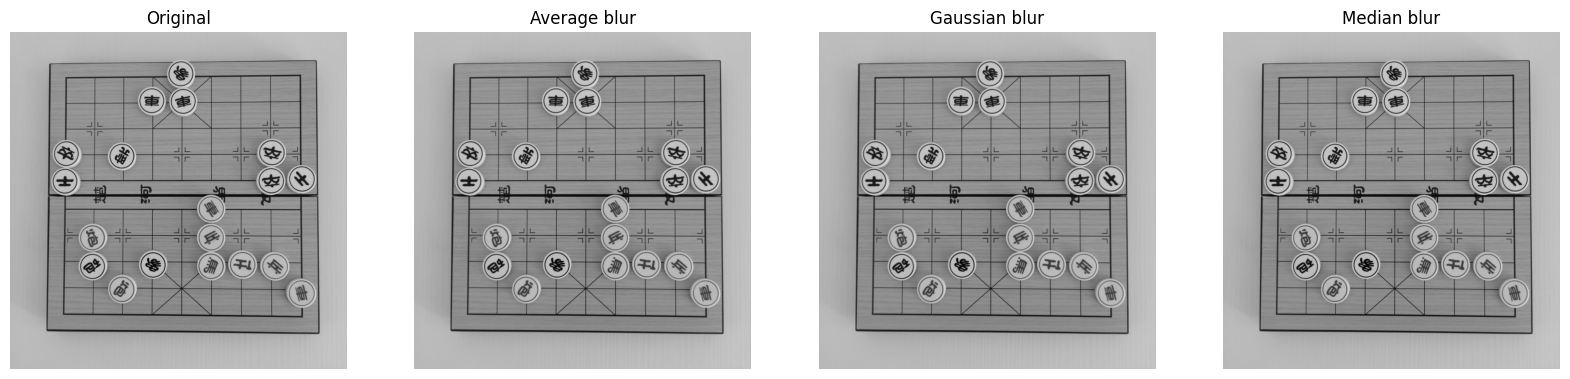

In [25]:
#) Smoothing/Blur

def avg_blur(img,kernel_size=(5,5)):
    avg_blur = cv2.blur(img,(5,5))
    return avg_blur
def g_blur(image, kernel_size=(9, 9)):
    g_blur = cv2.GaussianBlur(image, kernel_size, 0)
    return g_blur
def med_blur(image, kernel_size=5):
    med_blur = cv2.medianBlur(image, kernel_size)
    return med_blur
    
img7_avgblur = cb(avg_blur(img7))
img7_gblur = cb(g_blur(img7))
img7_mblur = cb(med_blur(img7))

imshow_all(cb(img7),img7_avgblur,img7_gblur,img7_mblur,titles=['Original','Average blur','Gaussian blur','Median blur'],axis='off')

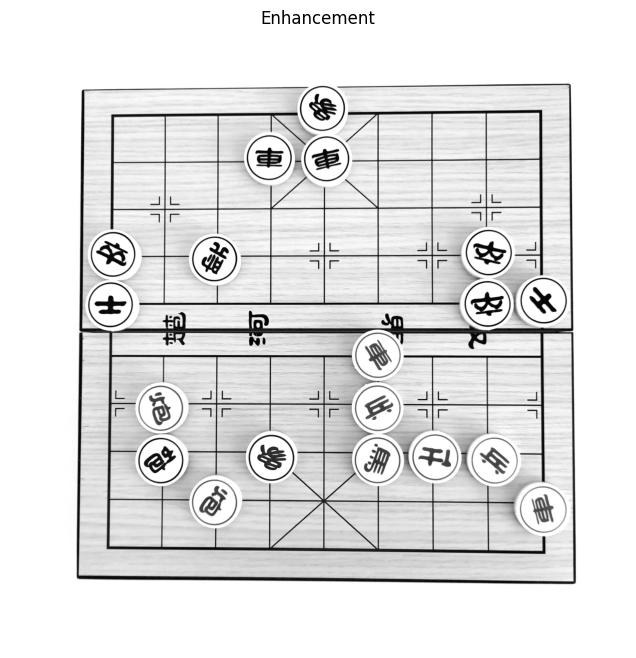

In [26]:
# IMAGE ENHANCEMENT
 
def en_img(image, alpha=2, beta=-60):
    en_img = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return en_img  
 
img7_en = en_img(img7)
plot1(img7_en,'Enhancement','off')
imshow_all(cb(img7),cb(img7_en),axis='off',titles = ['Original','Enhanced'])

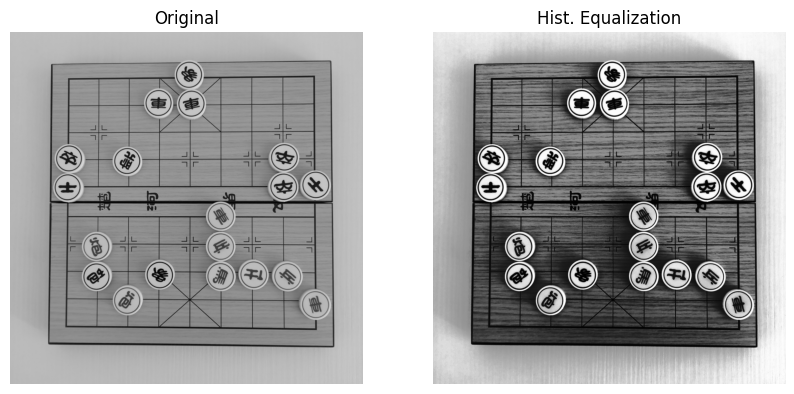

In [27]:
# HISTOGRAM EQUALIZATION

img7_eq = cv2.equalizeHist(img7g)
imshow_all(img7,cb(img7_eq),titles = ['Original','Hist. Equalization'],axis = 'off')

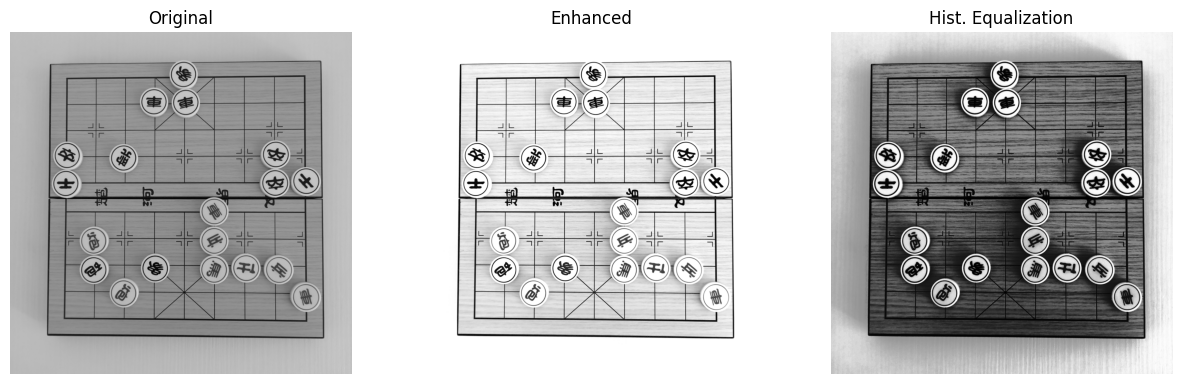

In [28]:
imshow_all(img7,cb(img7_en),cb(img7_eq),titles = ['Original','Enhanced','Hist. Equalization'],axis = 'off')

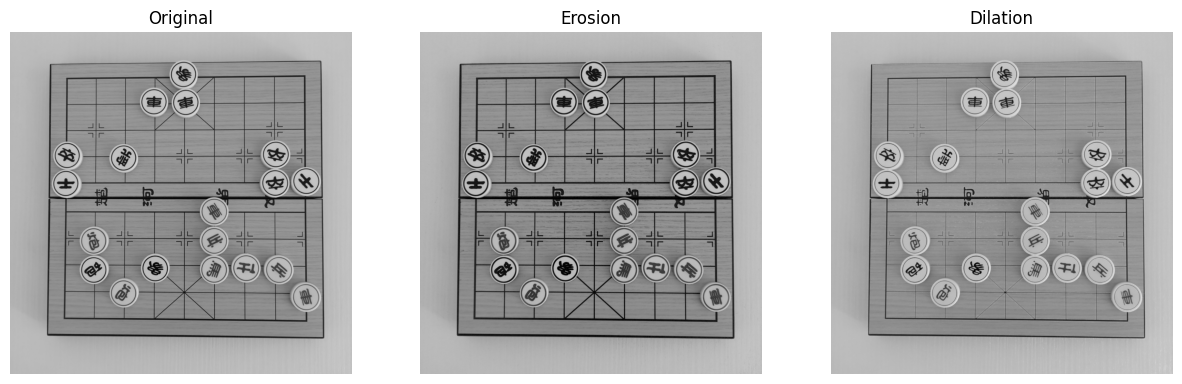

In [29]:
# DILATION AND EROSION

kernel = np.ones((5, 5), np.uint8)
img7_erosion = cv2.erode(img7, kernel, iterations=1) 
img7_dilation = cv2.dilate(img7, kernel, iterations=1) 
imshow_all(img7, img7_erosion, img7_dilation, titles=['Original','Erosion','Dilation'],axis = 'off')

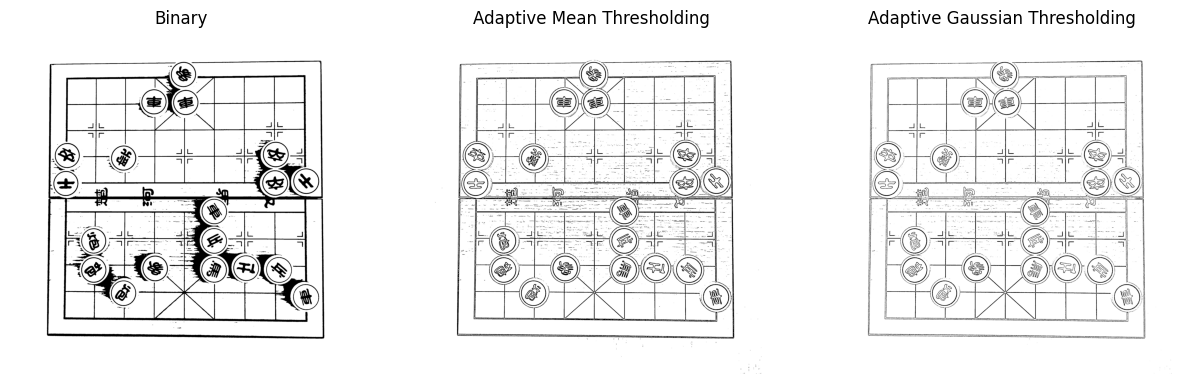

In [30]:
#THRESHOLDING 1
img = img7.copy()
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

#THRESHOLDING 2
img = cg(img7.copy())
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,5)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)

imshow_all(cb(th1),cb(th2),cb(th3),titles=['Binary','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'],axis='off')

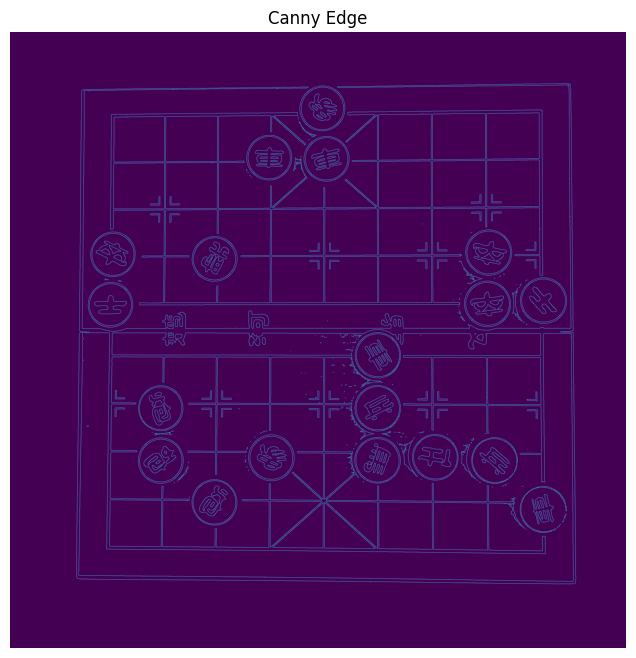

In [31]:
# CANNY EDGE DETECTION

img = img7 #_dilation
high_thresh, thresh_img = cv2.threshold(cg(img), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
img7_canny = cv2.Canny(thresh_img, lowThresh, high_thresh)           #low=100,high=200 is standard

plot1(img7_canny,'Canny Edge','off')

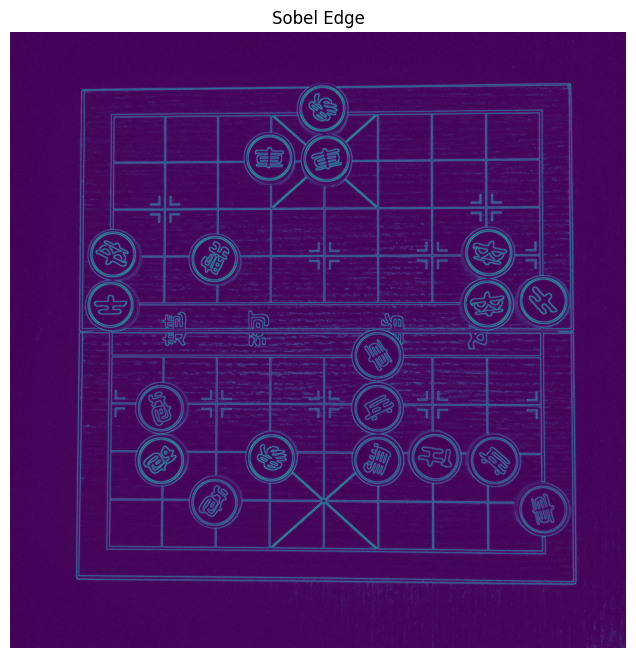

In [32]:
# SOBEL EDGE DETECTION

def sobel1(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel_image = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    return sobel_image

def sobel2(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad

img7_sobel = sobel1(cb(img7))
img7_sobel2 = sobel2(img7)

plot1(img7_sobel2,'Sobel Edge','off')

In [33]:
# HOUGH CIRCLE


def hough1(img7,_param1=200,_param2=100,_minDist = 1, _minRadius=100,_maxRadius=400):
    
    img77 = img7.copy()
    img78 = img7.copy() #
    cimg = cg(img7)
    cimg = cv2.GaussianBlur(cimg,(5,5),0)
    #cimg = cv2.medianBlur(cimg,5)
    circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1,minDist = _minDist,param1=_param1,param2=_param2, minRadius=_minRadius,maxRadius=_maxRadius)

    if circles is None:
        print('None!!')
    else:
        circles = np.uint16(np.around(circles))
        mask = np.zeros_like(img78) + 255 #
        mask2 = np.zeros_like(img78) + 255 #
        ic2 = []
        
        for i in circles[0,:]:

            # draw the outer circle
            cv2.circle(img77,(i[0],i[1]),i[2],(0,255,0),10)

            mask = cv2.circle(mask, (i[0],i[1]),i[2], (0,0,0), -1) #
            mask2 = cv2.circle(mask2, (i[0],i[1]),int(i[2]*0.8), (0,0,0), -1) #
            
            f1 = int(i[2]*1.5)
            start = (i[0] - f1, i[1] - f1)
            end = (i[0] + f1, i[1] + f1)

            # draw the center of the circle
            cv2.circle(img77,(i[0],i[1]),2,(0,0,255),3)

        plot1(img77,title = 'Hough Circle Detection',axis='off')
        
        a, img78b = cv2.threshold(img78,125,255,cv2.THRESH_BINARY)
        img79_circ_masked = cv2.bitwise_or(img78b, mask2)
    
        imshow_all(img7, img77, mask, img79_circ_masked, axis = 'off')
        imshow_all(img7, img77, axis = 'off')
        imshow_all(mask, img79_circ_masked, axis = 'off')
        

        for i in circles[0,:]:

            f1 = int(i[2]*1.5)
            start = (i[0] - f1, i[1] - f1)
            end = (i[0] + f1, i[1] + f1)
            ic2.append(img79_circ_masked[start[1]:end[1], start[0]:end[0]]) 

        return ic2


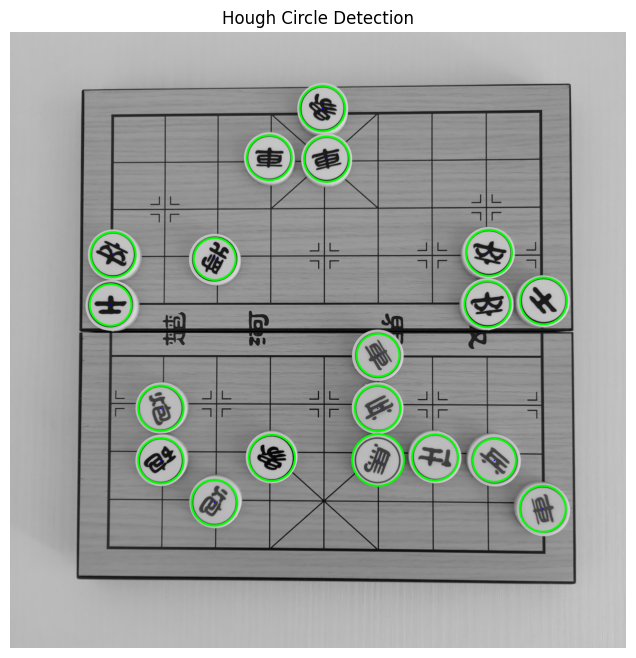

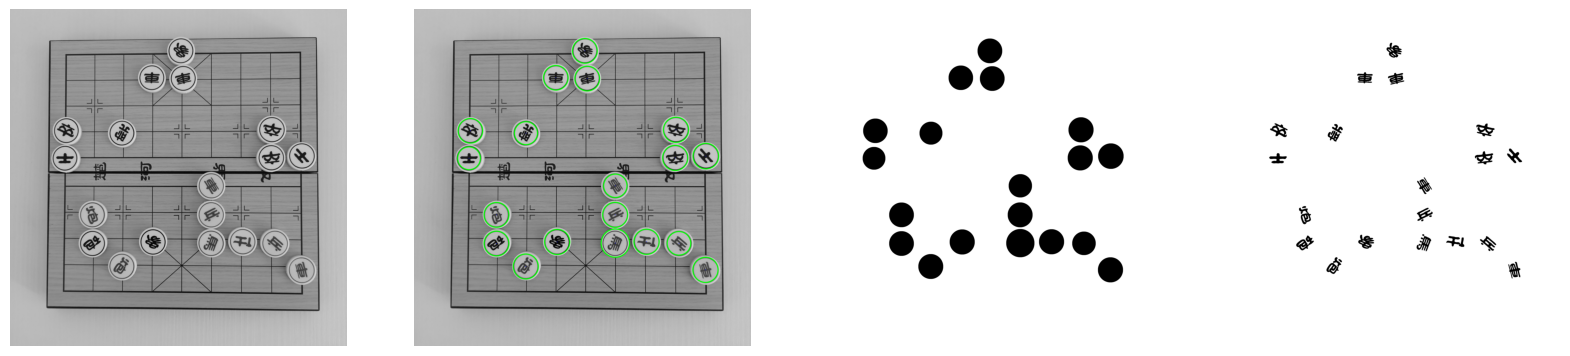

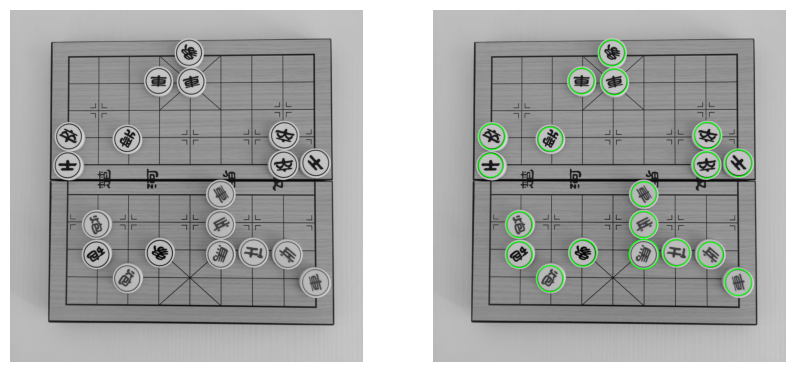

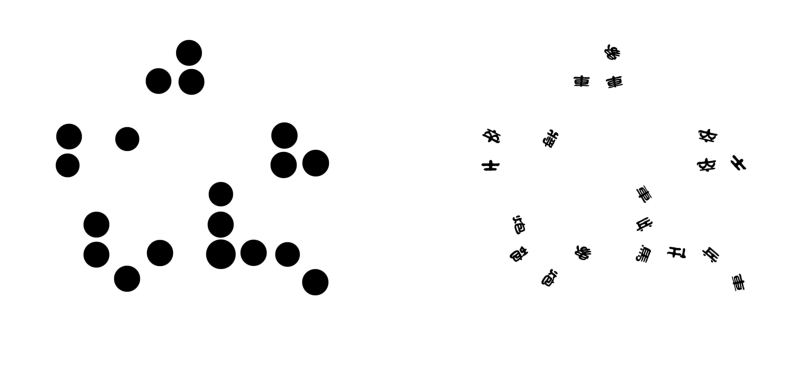

In [34]:
options = [img7, img7_en , img7_dilation, img7_canny, img7_sobel2]
options = [img7]
for opt in options:
    frags = hough1(opt,_minDist = 200, _minRadius=100, _maxRadius=300)  

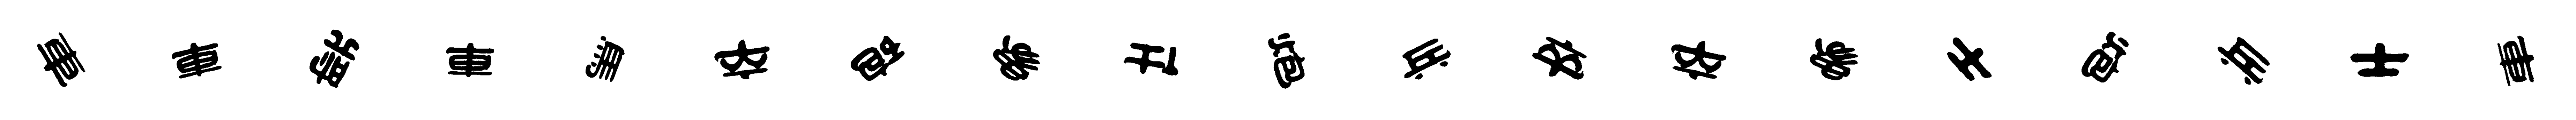

In [35]:
imshow_all(*frags,axis='off')

for t, fragm in enumerate(frags):
    a=1
    cv2.imwrite('imgs_p/p/comp_outputs/p2_0/%s_fragm%d.png' % (Path(input_img_path).stem , (t+1)), fragm)

In [36]:
# CHAR Identification 

char_ref = {1:'R',2:'R',3:'K',4:'H',5:'P',6:'C',7:'P',8:'K',9:'C',10:'A',11:'H',12:'E',13:'A',14:'E'}

def char_id():
    targets_directory = 'imgs_p/p/comp_outputs/p2_0'
    trg = []
    for t5 in os.listdir(targets_directory):
        f = os.path.join(targets_directory, t5)
        if os.path.isfile(f):
            trg.append(f)

    read0 = random.choice(trg)
    target0 = cv2.imread(read0)

    templates_directory = 'imgs_p/ch_db/a'
    tmpl = []
    for filename in os.listdir(templates_directory):
        f = os.path.join(templates_directory, filename)
        if os.path.isfile(f):
            tmpl.append(f)

    for templates in tmpl:

        target = target0.copy()
        target_erased = target0.copy()
        target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
        template = cv2.imread(templates,0)  ##
            
        # Threshold both images first before using cv2.findContours
        ret, thresh1 = cv2.threshold(template, 127, 255, 0)
        ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

        # We need to sort the contours by area so that we can remove the largest
        # contour which is the image outline
        sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
        # We extract the second largest contour which will be our template contour
        template_contour = contours[1]
        # Extract contours from second target image
        contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        for c in contours[1:]:
            # Iterate through each contour in the target image and 
            # use cv2.matchShapes to compare contour shapes
            match = cv2.matchShapes(template_contour, c, 2, 0.0)
        
            # If the match value is less than 0.15 we
            if (match < 0.15 and cv2.contourArea(c)>10000):
                closest_contour = c  
                cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
                cv2.drawContours(target_erased, [closest_contour], -1, (255,255,255), cv2.FILLED)
            else:
                closest_contour = [] 
                            
            # percentage of original character erased:
        tb = np.sum(thresh2 == 0)
        tba = np.sum(cg(target_erased) == 0)
        val = (1 - tba/tb)*100

        if val > 0.3:
            p = Path(templates).stem[0]
            #print(Path(templates).stem[0]) 
            print(char_ref[int(p)])
            imshow_all(target, cb(template), titles = ['target','template'])

            